**Lab_Assignment_6_19101100**

**Task 1: Loading dataset using pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

leaf_data= pd.read_csv('/content/sample_data/leaf_dataset.csv')

In [ ]:
leaf_data

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260


**Task 2: Replacing null values**

In [ ]:
leaf_data.isnull().sum()

Class(species)               0
specimen number              0
Eccentricity                 0
Aspect Ratio                 0
Elongation                   2
Solidity                     0
Stochastic Convexity         0
Isoperimetric Factor         0
Maximal Indentation Depth    1
Lobedness                    1
Average Intensity            0
Average Contrast             2
Smoothness                   0
Third moment                 0
Uniformity                   0
Entropy                      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(leaf_data[['Elongation']])
leaf_data['Elongation']=impute.transform(leaf_data[['Elongation']])

impute.fit(leaf_data[['Maximal Indentation Depth']])
leaf_data['Maximal Indentation Depth']=impute.transform(leaf_data[['Maximal Indentation Depth']])

impute.fit(leaf_data[['Lobedness']])
leaf_data['Lobedness']=impute.transform(leaf_data[['Lobedness']])

impute.fit(leaf_data[['Average Contrast']])
leaf_data['Average Contrast']=impute.transform(leaf_data[['Average Contrast']])

# leaf_data[['Elongation']].head(20)
leaf_data.head(10)

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
5,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068
6,1,7,0.82063,1.7529,0.44458,0.97964,0.99649,0.76770,0.005928,0.006395,0.018375,0.080587,0.006452,0.002271,0.000041,0.53904
7,1,8,0.77982,1.6215,0.39222,0.98512,0.99825,0.80816,0.005099,0.004731,0.024875,0.124720,0.007979,0.002466,0.000147,0.66975
8,1,9,0.83089,1.8199,0.45693,0.98240,1.00000,0.77106,0.006005,0.006564,0.007245,0.040616,0.001647,0.000388,0.000033,0.33696
9,1,10,0.90631,2.3906,0.58336,0.97683,0.99825,0.66419,0.008402,0.012848,0.007010,0.042347,0.001790,0.000459,0.000028,0.28082


In [ ]:
#There are no categorical values in my dataset.

**Splitting dataset into features and labels**

In [ ]:
from sklearn.model_selection import train_test_split

features=leaf_data.iloc[:,1:16]
labels=leaf_data.iloc[:,:1]

X_train, X_test, Y_train, Y_test=train_test_split(features,labels,test_size=0.2, random_state=1)
X_train

,specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
312,5,0.99799,15.0680,0.93667,0.88070,0.95789,0.12132,0.032164,0.188280,0.011686,0.054827,0.002997,0.000864,0.000044,0.50576
85,5,0.64803,1.3920,0.41362,0.89752,0.96316,0.50892,0.026737,0.130100,0.058284,0.150330,0.022099,0.007827,0.000364,1.18400
73,4,0.98326,5.8308,0.82878,0.96489,1.00000,0.30777,0.014672,0.039178,0.019278,0.073118,0.005318,0.001466,0.000098,0.66403
287,2,0.87024,2.1094,0.52863,0.98360,0.99298,0.60784,0.003174,0.001833,0.026902,0.091391,0.008283,0.002439,0.000161,0.73904
304,8,0.72174,1.5301,0.35707,0.97994,0.99649,0.78622,0.013545,0.033390,0.040677,0.114350,0.012908,0.003820,0.000361,0.98926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,10,0.53283,1.3078,0.25925,0.96727,1.00000,0.77065,0.017745,0.057312,0.053410,0.122590,0.014806,0.003592,0.001236,1.18860
255,5,0.82924,1.8903,0.47248,0.96435,0.99825,0.66100,0.023836,0.103410,0.005736,0.037634,0.001414,0.000369,0.000013,0.27099
72,3,0.98853,6.6280,0.84928,0.96861,0.97719,0.27717,0.029032,0.153400,0.032722,0.102830,0.010462,0.003339,0.000131,0.94985
235,8,0.75968,1.5763,0.38954,0.98731,1.00000,0.82323,0.005582,0.005671,0.034734,0.098208,0.009553,0.002707,0.000234,1.14330


**MinMaxScaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.307692,0.999183,0.779414,0.985629,0.777376,0.919992,0.045516,0.149521,0.025930,0.045378,0.092538,0.029215,0.021455,0.012592,0.132472
1,0.307692,0.602237,0.019530,0.341543,0.810460,0.930005,0.547603,0.121852,0.017854,0.362677,0.505283,0.325795,0.257049,0.122006,0.399590
2,0.230769,0.982476,0.266165,0.852773,0.942977,1.000000,0.287038,0.060341,0.005235,0.097074,0.171588,0.065248,0.041828,0.031063,0.194805
3,0.076923,0.854281,0.059392,0.483167,0.979779,0.986662,0.675742,0.001719,0.000051,0.148988,0.250561,0.111289,0.074741,0.052583,0.224347
4,0.538462,0.685843,0.027204,0.271907,0.972580,0.993331,0.906811,0.054595,0.004431,0.242786,0.349785,0.183095,0.121475,0.120869,0.322894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.692308,0.471570,0.014852,0.151451,0.947658,1.000000,0.886642,0.076008,0.007752,0.329489,0.385397,0.212563,0.113778,0.419573,0.401402
268,0.307692,0.807777,0.047218,0.414023,0.941915,0.996675,0.744604,0.107062,0.014150,0.004863,0.018234,0.004642,0.004721,0.002178,0.040010
269,0.153846,0.988453,0.310460,0.878017,0.950294,0.956661,0.247400,0.133553,0.021088,0.188618,0.299998,0.145118,0.105198,0.042419,0.307373
270,0.538462,0.728877,0.029771,0.311890,0.987077,1.000000,0.954753,0.013997,0.000584,0.202318,0.280022,0.130998,0.083839,0.077545,0.383561


In [ ]:
pd.DataFrame(X_test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.538462,0.128546,0.004940,0.146168,0.897972,0.949992,0.676467,0.193152,0.041686,0.711899,0.874279,0.799915,0.810330,0.142242,0.588949
1,0.076923,0.905947,0.086423,0.608278,0.913236,1.000000,0.532939,0.109958,0.014841,0.422327,0.515958,0.336896,0.248384,0.104863,0.572132
2,0.846154,0.770142,0.036277,0.366479,0.976258,1.000000,0.885605,0.025301,0.001333,0.058935,0.105525,0.034438,0.019862,0.044942,0.129223
3,0.692308,0.911641,0.104420,0.643028,0.950294,0.996675,0.565829,0.044613,0.003189,0.406965,0.583465,0.410909,0.371849,0.080799,0.421882
4,0.769231,0.622064,0.017847,0.162275,0.991365,1.000000,0.880657,0.011943,0.000474,0.086955,0.177094,0.068135,0.053700,0.015562,0.178713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.923077,0.545909,0.017414,0.271870,0.887075,0.996675,0.723204,0.086577,0.009719,0.274442,0.423342,0.246099,0.194619,0.118229,0.302241
64,0.461538,0.682134,0.010479,0.685573,0.531580,0.366678,0.225210,0.489369,0.246496,0.110277,0.171947,0.065436,0.038292,0.040152,0.247812
65,0.615385,0.857185,0.070821,0.555672,0.829422,0.976668,0.474609,0.281388,0.084862,0.483106,0.606630,0.437800,0.379563,0.085186,0.598677
66,0.692308,0.390073,0.009968,0.238166,0.824367,1.000000,0.618033,0.123504,0.018296,0.593322,0.644273,0.483090,0.333143,0.308207,0.608956


**Task 3:**

**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")

svc.fit(X_train_scaled, Y_train)
svc_predictions = svc.predict(X_test_scaled)
svc_predictions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([10, 14, 29, 14,  1, 36, 11, 33, 30, 22, 11, 13, 11, 15, 29, 14,  2,
       34,  2, 24, 13, 11, 29, 29, 36, 11, 13, 35,  8, 30,  1, 22,  1, 10,
       29, 34, 23, 28,  2, 11, 13, 28, 28,  9, 14,  9,  8, 23, 36, 24,  9,
        2,  1,  2,  2, 29, 26,  1, 36, 25, 23,  7, 13, 26,  6,  5, 30, 14])

In [ ]:
#According to suplementary video, accuracy of every 3 classifier before and after PCA to be found

prePCA_train_svc_accuracy=svc.score(X_train_scaled, Y_train)
print("Training accuracy of the model is {:.2f}".format(prePCA_train_svc_accuracy))
prePCA_test_svc_accuracy=svc.score(X_test_scaled,Y_test)
print("Testing accuracy of the model is {:.2f}".format(prePCA_test_svc_accuracy))


Training accuracy of the model is 0.60
Testing accuracy of the model is 0.34


**Neural Network (Multilayer Perceptron Classifier)**

In [ ]:
from sklearn.neural_network import MLPClassifier  
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000) 

nnc.fit(X_train_scaled, Y_train)
nnc_predictions=nnc.predict(X_test_scaled)
nnc_predictions

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([10, 14,  1, 14,  1, 36,  6, 33,  9, 22, 11, 27, 11, 15,  1, 14, 14,
       31, 32, 24, 33, 11, 29,  1, 36, 11, 33, 28, 34, 10,  4, 22,  4, 10,
        1, 34, 23, 28,  2, 11, 33, 28, 28,  9, 35, 10,  8, 23, 36,  9, 30,
        2,  1, 14,  2,  1,  3, 27, 36, 25, 23,  7,  4,  9,  6, 12, 10, 35])

In [ ]:
prePCA_train_nnc_accuracy=nnc.score(X_train_scaled, Y_train)
print("Training accuracy of the model is {:.2f}".format(prePCA_train_nnc_accuracy))
prePCA_test_nnc_accuracy=nnc.score(X_test_scaled,Y_test)
print("Testing accuracy of the model is {:.2f}".format(prePCA_test_nnc_accuracy))


Training accuracy of the model is 0.83
Testing accuracy of the model is 0.60


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)  #50 decision trees

rfc.fit(X_train_scaled, Y_train)
rfc_predictions = rfc.predict(X_test_scaled)
rfc_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([10, 12,  1, 14,  1, 36, 11, 33,  9, 22, 11, 26, 11, 15,  1, 12, 14,
       31, 14, 24, 13, 11, 29, 32, 36, 11, 14, 28, 34, 30, 24, 22,  1, 10,
       32, 34,  6, 12,  2, 11, 33, 14, 14, 10, 35, 10,  8, 23, 15,  9, 30,
        7, 32,  2,  2,  1,  3, 27, 11, 25, 23,  7, 33,  9,  6, 12,  9, 35])

In [ ]:
prePCA_train_rfc_accuracy=rfc.score(X_train_scaled, Y_train)
print("Training accuracy of the model is {:.2f}".format(prePCA_train_rfc_accuracy))
prePCA_test_rfc_accuracy=rfc.score(X_test_scaled,Y_test)
print("Testing accuracy of the model is {:.2f}".format(prePCA_test_rfc_accuracy))


Training accuracy of the model is 1.00
Testing accuracy of the model is 0.66


**Task 4: Dimensionality Reduction using PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)   #my dataset has 15 features and according to supplementary video, the next number, 8 is to be taken for odd number/2
principal_col=pca.fit_transform(scaler.fit_transform(features))
principal_col

array([[-3.62570839e-01, -3.41208468e-01,  8.70766587e-02, ...,
        -7.26792546e-02, -6.87283235e-04,  1.18968212e-02],
       [-1.17964038e-01, -5.31835244e-01,  1.40234619e-01, ...,
        -3.50522279e-02, -2.00077302e-02,  2.17075488e-02],
       [ 2.14225916e-02, -6.65769001e-01,  1.73608543e-01, ...,
        -5.70542642e-02, -1.90768372e-02,  4.54788724e-02],
       ...,
       [ 2.10874861e-01,  1.15215093e+00,  8.46147484e-02, ...,
         1.84075452e-01, -2.44362937e-01,  1.35953576e-01],
       [ 7.33129917e-01,  7.88270833e-01,  2.34195501e-01, ...,
        -1.31200306e-01, -2.85434163e-01,  1.76724913e-01],
       [ 6.91998475e-01,  1.35421905e+00,  2.08222441e-01, ...,
        -1.13342663e-01, -3.09171668e-01,  2.02204023e-01]])

In [ ]:
col=["Principal Col"+str(i) for i in range(1,9)]
sum(pca.explained_variance_ratio_)

0.9813352668602197

In [ ]:
post_table=pd.DataFrame(data=principal_col, columns=col)
post_table.head()

,Principal Col1,Principal Col2,Principal Col3,Principal Col4,Principal Col5,Principal Col6,Principal Col7,Principal Col8
0,-0.362571,-0.341208,0.087077,-0.349954,-0.081476,-0.072679,-0.000687,0.011897
1,-0.117964,-0.531835,0.140235,-0.288901,-0.092105,-0.035052,-0.020008,0.021708
2,0.021423,-0.665769,0.173609,-0.225988,-0.076380,-0.057054,-0.019077,0.045479
3,-0.041378,-0.622280,0.212636,-0.165539,-0.052400,-0.057566,-0.016498,0.027385
4,0.122453,-0.688110,0.118454,-0.086864,-0.059952,-0.055687,-0.037600,0.045714


In [ ]:
post_table['Label']=labels
post_table.head()
# post_table.shape

,Principal Col1,Principal Col2,Principal Col3,Principal Col4,Principal Col5,Principal Col6,Principal Col7,Principal Col8,Label
0,-0.362571,-0.341208,0.087077,-0.349954,-0.081476,-0.072679,-0.000687,0.011897,1
1,-0.117964,-0.531835,0.140235,-0.288901,-0.092105,-0.035052,-0.020008,0.021708,1
2,0.021423,-0.665769,0.173609,-0.225988,-0.076380,-0.057054,-0.019077,0.045479,1
3,-0.041378,-0.622280,0.212636,-0.165539,-0.052400,-0.057566,-0.016498,0.027385,1
4,0.122453,-0.688110,0.118454,-0.086864,-0.059952,-0.055687,-0.037600,0.045714,1


In [ ]:
post_features=post_table.drop('Label',axis=1)
post_label=post_table['Label']
post_features.head()

,Principal Col1,Principal Col2,Principal Col3,Principal Col4,Principal Col5,Principal Col6,Principal Col7,Principal Col8
0,-0.362571,-0.341208,0.087077,-0.349954,-0.081476,-0.072679,-0.000687,0.011897
1,-0.117964,-0.531835,0.140235,-0.288901,-0.092105,-0.035052,-0.020008,0.021708
2,0.021423,-0.665769,0.173609,-0.225988,-0.076380,-0.057054,-0.019077,0.045479
3,-0.041378,-0.622280,0.212636,-0.165539,-0.052400,-0.057566,-0.016498,0.027385
4,0.122453,-0.688110,0.118454,-0.086864,-0.059952,-0.055687,-0.037600,0.045714


**Splitting reduced data into train and test set**

In [ ]:
post_X_train, post_X_test, post_Y_train, post_Y_test = train_test_split(post_features, post_label , test_size=0.2 , random_state=1)

In [ ]:
for i in post_features.keys():
  print('max:', max(post_table[i]),'min',min(post_table[i]))
#needs scaling as max value of few columns of features>1 and min value<0.
#if not, comparison with scaled data before PCA might not be uniform

max: 1.4072384545197254 min -1.1721997191035787
max: 1.3542190527891058 min -0.7511373020962953
max: 0.7668056930368984 min -0.6673666130493668
max: 0.5684378643977301 min -0.4489422561233306
max: 0.5865315336517054 min -0.5796388658027022
max: 0.3955868569179986 min -0.3473255631373898
max: 0.827229818268146 min -0.3400342953407275
max: 0.24750574756160496 min -0.2463972019655263


**Scaling the new dataset after PCA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(post_X_train)
post_X_train_scaled=scaler.transform(post_X_train)
post_X_test_scaled=scaler.transform(post_X_test)

**Task 5:**

 **Support Vector Machine on Reduced Dataset**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")

svc.fit(post_X_train_scaled, post_Y_train)
post_svc_predictions = svc.predict(post_X_test_scaled)
post_svc_predictions

array([10,  5, 29,  5, 29, 36, 11, 13, 30,  5, 11, 13, 11, 15, 29,  5, 29,
        8, 13, 24, 13, 11, 29, 29, 36, 11, 13,  5,  8, 30, 13,  5, 13, 10,
       29,  8, 23,  5, 13, 11, 13,  5, 14, 13, 14, 30,  8, 29, 36, 13, 30,
       13, 29, 13, 13, 29, 26, 13, 36, 25, 29, 29, 13, 13, 11,  5, 30, 14])

In [ ]:
postPCA_train_svc_accuracy=svc.score(post_X_train_scaled, post_Y_train)
print("Training accuracy of the model is {:.2f}".format(postPCA_train_svc_accuracy))
postPCA_test_svc_accuracy=svc.score(post_X_test_scaled,post_Y_test)
print("Testing accuracy of the model is {:.2f}".format(postPCA_test_svc_accuracy))

Training accuracy of the model is 0.43
Testing accuracy of the model is 0.29


**Neural Network (MLPClassifier) on Reduced Dataset**

In [ ]:
from sklearn.neural_network import MLPClassifier  
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000) 

nnc.fit(post_X_train_scaled, post_Y_train)
post_nnc_predictions = nnc.predict(post_X_test_scaled)
post_nnc_predictions

array([10, 12,  1, 14, 24, 36, 11, 13, 30, 22, 11, 27, 11, 15,  1, 14, 22,
       31, 32,  4, 33, 11, 29,  1, 36, 11, 33, 28, 34, 10, 24, 22,  4, 10,
        2, 34, 23, 12,  2, 11, 33, 28, 28, 10, 14, 30,  8, 23, 36,  9, 30,
        7,  1, 32,  2,  1,  9, 27, 36, 25, 23,  7, 27, 26,  6, 12,  9, 35])

In [ ]:
postPCA_train_nnc_accuracy=nnc.score(post_X_train_scaled, post_Y_train)
print("Training accuracy of the model is {:.2f}".format(postPCA_train_nnc_accuracy))
postPCA_test_nnc_accuracy=nnc.score(post_X_test_scaled,post_Y_test)
print("Testing accuracy of the model is {:.2f}".format(postPCA_test_nnc_accuracy))

Training accuracy of the model is 0.79
Testing accuracy of the model is 0.68


**Random Forest on Reduced Dataset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)  

rfc.fit(post_X_train_scaled, post_Y_train)
post_rfc_predictions = rfc.predict(post_X_test_scaled)
post_rfc_predictions

array([10, 12,  1, 14, 24, 36, 11, 33, 10, 22, 11, 27, 11, 15,  1, 14, 14,
       31,  1, 24, 33, 11, 29,  1, 36, 11, 33, 14, 34, 30, 24, 22, 24, 10,
       32, 34, 23, 28,  2, 11, 33, 14, 14, 33, 35, 30,  8, 23, 36,  4,  9,
        7,  1, 32,  2,  1,  3, 27, 36, 25, 23,  7, 13,  9,  6, 12,  9, 35])

In [ ]:
postPCA_train_rfc_accuracy=rfc.score(post_X_train_scaled, post_Y_train)
print("Training accuracy of the model is {:.2f}".format(postPCA_train_rfc_accuracy))
postPCA_test_rfc_accuracy=rfc.score(post_X_test_scaled,post_Y_test)
print("Testing accuracy of the model is {:.2f}".format(postPCA_test_rfc_accuracy))

Training accuracy of the model is 1.00
Testing accuracy of the model is 0.65


**Task 6: Comparing Accuracy of pre-PCA and post-PCA results**

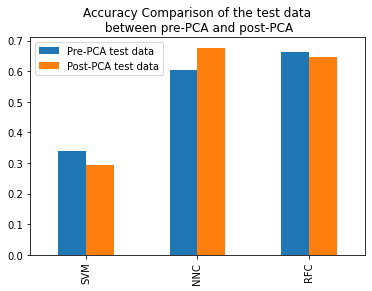

In [ ]:
#Plotting all of the classifiers
comp_test_data= {"Pre-PCA test data":[prePCA_test_svc_accuracy,prePCA_test_nnc_accuracy,prePCA_test_rfc_accuracy],
                "Post-PCA test data":[postPCA_test_svc_accuracy,postPCA_test_nnc_accuracy,postPCA_test_rfc_accuracy]}
comp_test_axis= ["SVM", "NNC", "RFC"];
test_chart=pd.DataFrame(data=comp_test_data, index=comp_test_axis)
test_chart.plot.bar()
plt.title("Accuracy Comparison of the test data\n between pre-PCA and post-PCA")
plt.show()

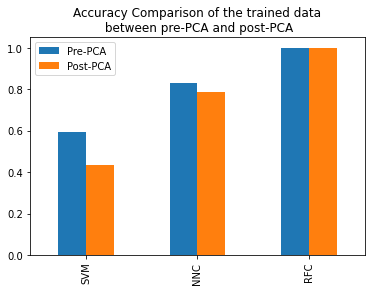

In [ ]:
#Plotting all of the classifiers trained data
comp_train_data= {"Pre-PCA":[prePCA_train_svc_accuracy,prePCA_train_nnc_accuracy,prePCA_train_rfc_accuracy],
                "Post-PCA":[postPCA_train_svc_accuracy,postPCA_train_nnc_accuracy,postPCA_train_rfc_accuracy]}
comp_train_axis= ["SVM", "NNC", "RFC"];
train_chart= pd.DataFrame(data=comp_train_data, index=comp_train_axis)
train_chart.plot.bar()
plt.title("Accuracy Comparison of the trained data\n between pre-PCA and post-PCA")
plt.show()
